<a href="https://colab.research.google.com/github/shaarminey/Using-NLP-to-detect-positive-and-negative-reviews/blob/main/Using_NLP_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Using NLP to create Bag of Words segregate restaurant reviews into positive and negative reviews

## Importing the libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS
import plotly.graph_objects as go

## Importing the dataset

In [ ]:
df = pd.read_csv('Restaurant_Reviews.tsv', delimiter = '\t', quoting = 3)

In [ ]:
# Lets check the first five rows of data
df.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [ ]:
# Shape
df.shape

(1000, 2)

In [ ]:
df['Liked'].value_counts()

1    500
0    500
Name: Liked, dtype: int64

In [ ]:
Labels = pd.DataFrame(df['Liked'].value_counts()).reset_index()
Labels.columns = ['Liked','Count']
Labels['Liked'] = Labels['Liked'].map({0: 'Negative',1: 'Positive'})

fig = px.pie(Labels, values = 'Count', names = 'Liked', title='Percentage of reviews', hole=.4, color = 'Liked',
             width=800, height=400)
fig.show()

In [ ]:
positive_reviews = df[df["Liked"] == 1]

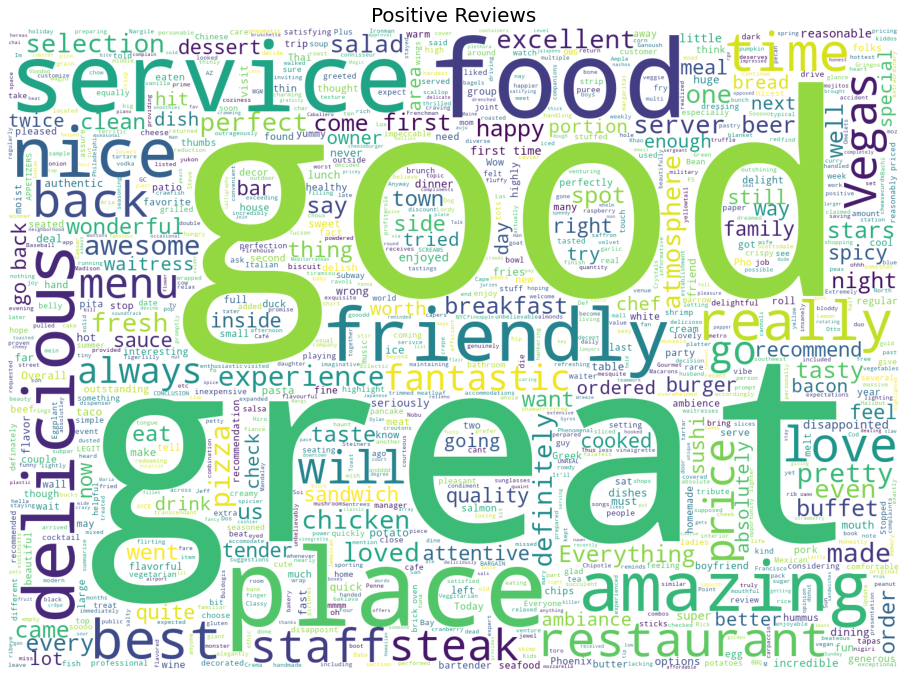

In [ ]:
plt.subplots(figsize=(16,13))
wordcloud = WordCloud(
                          background_color='white',max_words = 10000,
                          width=1500, stopwords=STOPWORDS,
                          height=1080
                         ).generate(" ".join(positive_reviews.Review))
plt.title("Positive Reviews", fontsize=20)
plt.imshow(wordcloud.recolor( colormap= 'viridis'))
plt.axis('off')
plt.show()

In [ ]:
negative_reviews = df[df["Liked"] == 0]

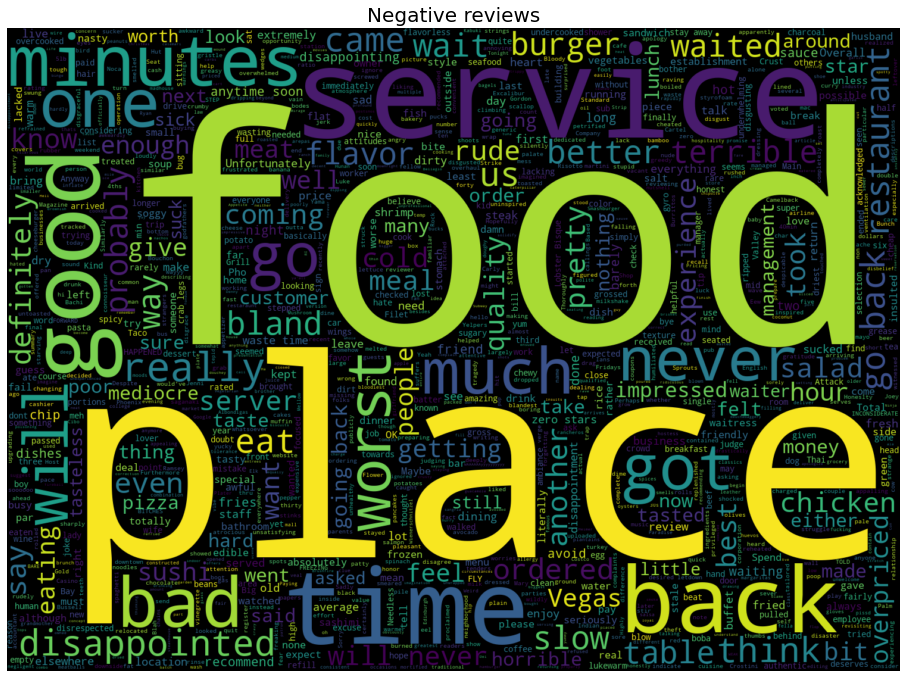

In [ ]:
plt.subplots(figsize=(16,13))
wordcloud = WordCloud(
                          background_color='black',max_words = 10000,
                          width=1500, stopwords=STOPWORDS,
                          height=1080
                         ).generate(" ".join(negative_reviews.Review))
plt.title("Negative reviews", fontsize=20)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

## Cleaning the texts

In [ ]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
corpus = []
for i in range(0, 1000):
  review = re.sub('[^a-zA-Z]', ' ', dataset['Review'][i])
  review = review.lower()
  review = review.split()
  ps = PorterStemmer()
  all_stopwords = stopwords.words('english')
  all_stopwords.remove('not')
  review = [ps.stem(word) for word in review if not word in set(all_stopwords)]
  review = ' '.join(review)
  corpus.append(review)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
print(corpus)

['wow love place', 'crust not good', 'not tasti textur nasti', 'stop late may bank holiday rick steve recommend love', 'select menu great price', 'get angri want damn pho', 'honeslti tast fresh', 'potato like rubber could tell made ahead time kept warmer', 'fri great', 'great touch', 'servic prompt', 'would not go back', 'cashier care ever say still end wayyy overpr', 'tri cape cod ravoli chicken cranberri mmmm', 'disgust pretti sure human hair', 'shock sign indic cash', 'highli recommend', 'waitress littl slow servic', 'place not worth time let alon vega', 'not like', 'burritto blah', 'food amaz', 'servic also cute', 'could care less interior beauti', 'perform', 'right red velvet cake ohhh stuff good', 'never brought salad ask', 'hole wall great mexican street taco friendli staff', 'took hour get food tabl restaur food luke warm sever run around like total overwhelm', 'worst salmon sashimi', 'also combo like burger fri beer decent deal', 'like final blow', 'found place accid could not

## Creating the Bag of Words model

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 1500)
X = cv.fit_transform(corpus).toarray()
y = dataset.iloc[:, -1].values

## Splitting the dataset into the Training set and Test set

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

## Training the Naive Bayes model on the Training set

In [ ]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

## Predicting the Test set results

In [ ]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[1 0]
 [1 0]
 [1 0]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [1 0]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [1 0]
 [1 0]
 [0 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [1 0]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [1 0]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 0]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 0]
 [0 1]
 [1 1]
 [1 1]
 [1 0]
 [0 1]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [0 1]
 [0 1]
 [1 1]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [0 1]
 [1 1]
 [1 1]

## Making the Confusion Matrix

[[55 42]
 [12 91]]


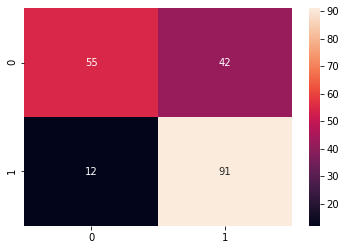

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)
sns.heatmap(cm,annot=True)
plt.show()

In [ ]:
print(X_test)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
accuracy_score(y_test, y_pred)

0.73

## Predicting if a single review is positive or negative

### Positive review

Use our model to predict if the following review:

"I love this restaurant so much"

is positive or negative.

**Solution:** We just repeat the same text preprocessing process we did before, but this time with a single review.

In [ ]:
new_review = 'I love the chicken here'
new_review = re.sub('[^a-zA-Z]', ' ', new_review)
new_review = new_review.lower()
new_review = new_review.split()
ps = PorterStemmer()
all_stopwords = stopwords.words('english')
all_stopwords.remove('not')
new_review = [ps.stem(word) for word in new_review if not word in set(all_stopwords)]
new_review = ' '.join(new_review)
new_corpus = [new_review]
new_X_test = cv.transform(new_corpus).toarray()
new_y_pred = classifier.predict(new_X_test)
print(new_y_pred)

[1]


The review was correctly predicted as positive by our model.

### Negative review

Use our model to predict if the following review:

"I hate this restaurant so much"

is positive or negative.

**Solution:** We just repeat the same text preprocessing process we did before, but this time with a single review.

In [ ]:
new_review = 'the chicken is so bland'
new_review = re.sub('[^a-zA-Z]', ' ', new_review)
new_review = new_review.lower()
new_review = new_review.split()
ps = PorterStemmer()
all_stopwords = stopwords.words('english')
all_stopwords.remove('not')
new_review = [ps.stem(word) for word in new_review if not word in set(all_stopwords)]
new_review = ' '.join(new_review)
new_corpus = [new_review]
new_X_test = cv.transform(new_corpus).toarray()
new_y_pred = classifier.predict(new_X_test)
print(new_y_pred)

[0]


The review was correctly predicted as negative by our model.